## Trabalho Prático - Python para Ciência de Dados

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Python para Ciência de Dados 

Prof.: Rodrigo Silva 

Aluno: Christhian da S. Gonçalves 

## 01. Sobre o conjunto de dados

O conjunto principal é uma versão atualizada do conjunto de dados da Califórnia de 1990. Este conjunto de dados foi relatado pela primeira vez no artigo: Sparse Spatial Autoregressions de Pace, R. Kelley e Ronald Barry. Os autores usaram os dados do Censo de 1990. O conjunto de dados atualizado contém os dados coletados pelo American Community Survey de 5 anos do US Census Bureau (2009 - 2020) no nível do grupo de quarteirões.

Grupos de Blocos (BGs) são divisões estatísticas de setores censitários, geralmente definidos para conter entre 600 e 3.000 pessoas, e são usados ​​para apresentar dados e controlar a numeração dos blocos. As variáveis ​​escolhidas dentro de cada grupo de quarteirões são: população, domicílios, total de cômodos, total de dormitórios, valor médio das casas, faixas de renda e faixas etárias das estruturas habitacionais. As variáveis ​​são recuperadas em nível de estado, município, área e grupo de quarteirões.

Link: https://www.kaggle.com/datasets/ebelmagnin/housing?select=california_housing_updated.csv

O conjunto de dados secundário é relacionado a taxas de criminalidade e nos dados de empregos policiais no estado da Califórnia.

Link: https://www.kaggle.com/datasets/fbi-us/california-crime

## 02. Análise Exploratória dos Dados

### 2.1 Importando bibliotecas

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder
import time

### 2.2 Carregando base de dados

In [107]:
df_house = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/california_housing_updated.csv")
df_crime = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/ca_offenses_by_county.csv")

### 2.3 Análise dos dados

##### Dados de 'df_house'

In [108]:
display(df_house.info(),'df_house.head()',df_house.head(),'df_house.isna().mean()',df_house.isna().mean(),'df_house.describe()',df_house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25591 entries, 0 to 25590
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      25591 non-null  object 
 1   total_population          25591 non-null  float64
 2   total_households          25591 non-null  float64
 3   average_household_income  25591 non-null  float64
 4   average_house_age         25591 non-null  float64
 5   total_rooms               25557 non-null  float64
 6   total_bedrooms            25591 non-null  float64
 7   median_house_value        25591 non-null  float64
 8   longitude                 25591 non-null  float64
 9   latitude                  25591 non-null  float64
 10  ocean_proximity           25591 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


None

'df_house.head()'

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,1713.0,644.0,150520.19,23.5,5300.0,723.0,1633100.0,-122.2344,37.8681,<1H OCEAN
1,Alameda County,1322.0,630.0,167222.22,16.7,4535.0,688.0,1126800.0,-122.2222,37.8587,NEAR BAY
2,Alameda County,940.0,417.0,171948.44,43.0,2800.0,429.0,1646200.0,-122.2480,37.8503,<1H OCEAN
3,Alameda County,1043.0,413.0,150914.04,38.6,2277.0,427.0,1418800.0,-122.2517,37.8457,NEAR BAY
4,Alameda County,1206.0,423.0,167677.30,36.9,2583.0,463.0,1447400.0,-122.2480,37.8450,<1H OCEAN


'df_house.isna().mean()'

name                        0.000000
total_population            0.000000
total_households            0.000000
average_household_income    0.000000
average_house_age           0.000000
total_rooms                 0.001329
total_bedrooms              0.000000
median_house_value          0.000000
longitude                   0.000000
latitude                    0.000000
ocean_proximity             0.000000
dtype: float64

'df_house.describe()'

,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude
count,25591.000000,25591.000000,25591.000000,25591.000000,2.555700e+04,25591.000000,2.559100e+04,25591.000000,25591.000000
mean,1537.494549,512.020398,92004.845269,26.505346,-3.388202e+06,555.310265,-6.236765e+07,-119.487318,35.535162
std,778.122087,234.890550,34058.549719,7.771489,4.742731e+07,255.106035,1.951191e+08,1.957278,2.078309
min,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,-6.666667e+08,-124.163400,32.545900
25%,1009.000000,348.000000,66177.610000,21.600000,1.908000e+03,376.000000,2.984000e+05,-121.640100,33.931000
50%,1421.000000,475.000000,89021.440000,26.900000,2.639000e+03,514.000000,4.814000e+05,-118.591100,34.260900
75%,1940.000000,640.500000,115609.600000,32.100000,3.634000e+03,694.000000,7.351500e+05,-117.950950,37.680550
max,39373.000000,7133.000000,212500.000000,45.500000,4.649700e+04,7960.000000,2.000001e+06,-114.346700,41.746200


In [109]:
#Verificando linhas da coluna total_rooms que possui valores negativos
df_house[df_house['total_rooms'] < 0]


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
302,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-117.7864,34.0530,INLAND
336,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.1425,37.7528,<1H OCEAN
495,Alameda County,75.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.2465,37.7789,NEAR BAY
879,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9437,37.5089,NEAR OCEAN
904,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9713,37.5610,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
24919,Tuolumne County,2375.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-120.5392,37.8936,INLAND
24994,Ventura County,814.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.2107,34.2693,NEAR OCEAN
25070,Ventura County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.4044,34.0102,ISLAND
25397,Ventura County,124.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.5145,33.2499,ISLAND


In [110]:
#median_house_value com valores negativos e e demais colunas com dados consistentes
df_house[df_house['median_house_value'] < 0]



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
28,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,-666666666.0,-122.2692,37.8300,<1H OCEAN
29,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,-666666666.0,-122.2754,37.8271,NEAR BAY
39,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,-666666666.0,-122.2705,37.8153,NEAR BAY
43,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,-666666666.0,-122.2732,37.8174,NEAR BAY
60,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,-666666666.0,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
25573,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,-666666666.0,-121.3704,39.0317,INLAND
25577,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,-666666666.0,-121.3495,39.0898,INLAND
25578,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,-666666666.0,-121.3596,39.1074,INLAND
25579,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,-666666666.0,-121.3307,39.1092,INLAND


*OBS*: Filtrando numeros negativos em 'total_rooms' é possível verificar que as demais colunas estão com dados nulos, com isso, estas 130 linhas foram excluidas da base de dados.
Filtrando os números negativos da coluna 'median_house_value',verifica-se que pode ter havido um erro na imputação dos dados. com isso optou-se por substituir valores incorretos pela média da categoria que a linha pertence.

In [111]:
#Excluindo linhas apartir da coluna total_rooms
df_house = df_house.drop(df_house[df_house['total_rooms'] < 0].index)

#substituir os números negativos da coluna 'median_house_value', pela média da categoria que a linha pertence
df_house_temp = df_house.drop(df_house[df_house['median_house_value'] < 0].index)
df_house_temp = df_house_temp.groupby('name')['median_house_value'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else df_house_temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['median_house_value'] = df_house.apply(lambda row: subst_negat(row['median_house_value'], row['name']), axis=1)

df_house_temp.reset_index()
#verificando resultado
df_house.merge(df_house_temp, on='median_house_value')



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,819936.834302,-122.2692,37.8300,<1H OCEAN
1,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,819936.834302,-122.2754,37.8271,NEAR BAY
2,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,819936.834302,-122.2705,37.8153,NEAR BAY
3,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,819936.834302,-122.2732,37.8174,NEAR BAY
4,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,819936.834302,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
2286,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,256866.000000,-121.3704,39.0317,INLAND
2287,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,256866.000000,-121.3495,39.0898,INLAND
2288,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,256866.000000,-121.3596,39.1074,INLAND
2289,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,256866.000000,-121.3307,39.1092,INLAND


In [112]:
df_house[df_house['total_households'] <= 0]

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
3971,Lassen County,8193.0,0.0,0.0,24.2,NaN,24.0,205427.272727,-121.5733,39.1183,INLAND
18009,San Diego County,3443.0,0.0,0.0,30.5,NaN,11.0,636838.718019,-117.1990,32.7398,NEAR OCEAN
21882,Santa Barbara County,13.0,0.0,0.0,16.7,29.0,17.0,770377.379182,-119.9233,33.9806,ISLAND
24906,Tuolumne County,45.0,0.0,0.0,40.4,311.0,91.0,327738.775510,-119.5269,37.9444,INLAND


In [113]:

df_house[df_house.isnull().any(axis=1)]

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
467,Alameda County,11.0,5.0,87500.00,40.5,NaN,5.0,8.199368e+05,-122.3016,37.8380,NEAR BAY
3007,Humboldt County,991.0,15.0,87500.00,25.5,NaN,15.0,3.423439e+05,-119.2917,34.4475,INLAND
3971,Lassen County,8193.0,0.0,0.00,24.2,NaN,24.0,2.054273e+05,-121.5733,39.1183,INLAND
6997,Los Angeles County,2056.0,4.0,162500.00,5.5,NaN,4.0,6.971177e+05,-117.8169,34.0574,INLAND
9305,Los Angeles County,260.0,11.0,106136.36,34.1,NaN,11.0,6.971177e+05,-118.1994,33.7860,<1H OCEAN
10407,Los Angeles County,32.0,16.0,37500.00,15.5,NaN,16.0,6.971177e+05,-118.4664,34.4100,INLAND
10535,Los Angeles County,65.0,17.0,52500.00,25.5,NaN,17.0,6.971177e+05,-118.4929,34.2105,INLAND
10548,Los Angeles County,45.0,14.0,76785.71,28.4,NaN,14.0,6.971177e+05,-118.3731,34.2664,INLAND
10557,Los Angeles County,14.0,14.0,7500.00,30.5,NaN,14.0,6.971177e+05,-118.2097,33.7565,NEAR OCEAN
10558,Los Angeles County,9.0,9.0,67500.00,35.5,NaN,9.0,6.971177e+05,-118.0474,33.9034,<1H OCEAN


In [114]:
#Eliminando linhas total_households com dados faltantes
df_house = df_house.drop(df_house[df_house['total_households'] <= 0].index)

temp = df_house.drop(df_house[df_house['total_rooms'] < 0].index)
temp = temp.groupby('name')['total_rooms'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['total_rooms'] = df_house.apply(lambda row: subst_negat(row['total_rooms'], row['name']), axis=1)


df_house = df_house.drop(df_house[df_house['total_rooms'] <= 0].index)

temp.reset_index()
#verificando resultado
df_house.merge(temp, on='total_rooms').head()


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,11.0,5.0,87500.00,40.5,2724.664889,5.0,819936.834302,-122.3016,37.8380,NEAR BAY
1,Alpine County,1159.0,397.0,90925.69,22.4,8006.000000,1794.0,372500.000000,-120.1317,39.5629,INLAND
2,Sacramento County,3537.0,1155.0,114491.34,11.7,8006.000000,1155.0,387300.000000,-117.3114,34.0530,INLAND
3,Humboldt County,991.0,15.0,87500.00,25.5,2820.132743,15.0,342343.925234,-119.2917,34.4475,INLAND
4,Los Angeles County,2056.0,4.0,162500.00,5.5,2606.779731,4.0,697117.685414,-117.8169,34.0574,INLAND


In [115]:
#Transformando categorias em pesos numéricos
ocean_prox = df_house['ocean_proximity'].value_counts()
df_house['ocean_proximity'] = LabelEncoder().fit_transform(df_house['ocean_proximity'])

display(ocean_prox, df_house['ocean_proximity'].value_counts())


ocean_proximity
INLAND        12869
<1H OCEAN      6436
NEAR OCEAN     3853
NEAR BAY       2297
ISLAND            2
Name: count, dtype: int64

ocean_proximity
1    12869
0     6436
4     3853
3     2297
2        2
Name: count, dtype: int64

Como temos valores de preço das casas dispostos como uma média, é realizado a média do total de comodos por familia e a média da renda por familia.

In [116]:
#Para normalizar os dados é realizado a média de comodos por familia/casa
df_house['median_rooms'] = df_house['total_rooms'] /df_house['total_households']
#Para normalizar os dados é realizado a média de quartos por familia/casa
df_house['median_bedrooms'] = df_house['total_bedrooms'] /df_house['total_households']
#Para normalizar os dados é realizado a média da renda familiar por pessoa
df_house['median_income'] = df_house['average_household_income'] /df_house['total_population']
#Excluir colunas não relevantes
del df_house['total_rooms'] 
del df_house['total_bedrooms'] 
del df_house['average_household_income'] 

df_house

,name,total_population,total_households,average_house_age,median_house_value,longitude,latitude,ocean_proximity,median_rooms,median_bedrooms,median_income
0,Alameda County,1713.0,644.0,23.5,1633100.0,-122.2344,37.8681,0,8.229814,1.122671,87.869346
1,Alameda County,1322.0,630.0,16.7,1126800.0,-122.2222,37.8587,3,7.198413,1.092063,126.491846
2,Alameda County,940.0,417.0,43.0,1646200.0,-122.2480,37.8503,0,6.714628,1.028777,182.923872
3,Alameda County,1043.0,413.0,38.6,1418800.0,-122.2517,37.8457,3,5.513317,1.033898,144.692272
4,Alameda County,1206.0,423.0,36.9,1447400.0,-122.2480,37.8450,0,6.106383,1.094563,139.035904
...,...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,565.0,21.2,496500.0,-121.3437,39.2926,1,6.867257,1.044248,76.039921
25587,Yuba County,841.0,371.0,23.9,215500.0,-121.1380,39.4516,1,7.016173,1.590296,73.851558
25588,Yuba County,953.0,378.0,24.6,246800.0,-121.3199,39.4271,1,6.087302,1.124339,47.052749
25589,Yuba County,957.0,447.0,29.1,266700.0,-121.2128,39.4224,1,7.982103,1.328859,67.692665


In [117]:
#Realizado o tratamento das colunas do nome da cidade para realizar o merge de forma correta
df_house['name'] = df_house['name'].str.replace(' County', '')


##### Dados de 'df_crime'

In [118]:
display(df_crime.info(),'df_crime.head()',df_crime.head(),'df_crime.isna().mean',df_crime.isna().mean(),'df_crimey.describe()',df_crime.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metropolitan/Nonmetropolitan          57 non-null     object 
 1   County                                57 non-null     object 
 2   Violent crime                         57 non-null     object 
 3   Murder and nonnegligent manslaughter  57 non-null     float64
 4   Rape (revised definition)             57 non-null     float64
 5   Rape(legacy definition)               0 non-null      float64
 6   Robbery                               57 non-null     object 
 7   Aggravated assault                    57 non-null     object 
 8   Property crime                        57 non-null     object 
 9   Burglary                              57 non-null     object 
 10  Larceny-theft                         57 non-null     object 
 11  Motor vehicle the

None

'df_crime.head()'

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0


'df_crime.isna().mean'

Metropolitan/Nonmetropolitan            0.978009
County                                  0.978009
Violent crime                           0.978009
Murder and nonnegligent manslaughter    0.978009
Rape (revised definition)               0.978009
Rape(legacy definition)                 1.000000
Robbery                                 0.978009
Aggravated assault                      0.978009
Property crime                          0.978009
Burglary                                0.978009
Larceny-theft                           0.978009
Motor vehicle theft                     0.978009
Arson                                   0.978009
dtype: float64

'df_crimey.describe()'

,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Arson
count,57.000000,57.000000,0.0,57.000000
mean,6.614035,32.385965,NaN,20.526316
std,14.315020,49.598659,NaN,50.934519
min,0.000000,0.000000,NaN,0.000000
25%,1.000000,7.000000,NaN,0.000000
50%,3.000000,18.000000,NaN,6.000000
75%,6.000000,32.000000,NaN,15.000000
max,98.000000,304.000000,NaN,300.000000


In [119]:
#deletando coluna nula e retirando linhas em branco
del df_crime['Rape(legacy definition)'] 
df_crime.dropna(inplace=True)
df_crime

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,112,810,"3,810","1,398","1,838",574,145.0
5,Metropolitan Counties,Imperial3,219,0.0,6.0,7,206,625,202,395,28,21.0
6,Metropolitan Counties,Kern,"2,235",31.0,157.0,360,"1,687","9,903","3,243","4,777","1,883",300.0
7,Metropolitan Counties,Kings3,122,2.0,16.0,9,95,470,193,265,12,5.0
8,Metropolitan Counties,Los Angeles,"5,173",98.0,304.0,"1,212","3,559","16,301","3,739","8,359","4,203",215.0
9,Metropolitan Counties,Madera,334,1.0,18.0,26,289,"1,252",556,686,10,4.0


In [120]:
#Corriginodo dados: Coluna de County com valores que deveriam estar na coluna seguinte, provável erro de imputação de dados onde faltou virgula para separar
#                   nome do condado do numero em milhar que é separado por virgula e aspas duplas na base de dados em CSV.
import re
def corrigir_linha (row):
    County = row['County']
    Violent_crime = row['Violent crime']

    match = re.match(r'(\D+)(\d+)', County)# Procura por um ou mais caracteres não numéricos seguidos por um ou mais dígitos numéricos
    if match:

        row['County'] = match.group(1)
        row['Violent crime'] = (match.group(2)) + Violent_crime 
    return row

# Aplicar a função de correção na coluna 'County' e 'Violent crime'
df_crime = df_crime.apply(corrigir_linha, axis=1)

df_crime = df_crime.sort_values(by='County') #Organiza linhas em ordem alfabetica em função do coluna County
df_crime

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,177,314,"2,077",463,985,629,11.0
36,Nonmetropolitan Counties,Alpine,39,0.0,0.0,0,9,35,15,19,1,0.0
37,Nonmetropolitan Counties,Amador,350,1.0,2.0,5,42,340,130,205,5,1.0
1,Metropolitan Counties,Butte,3155,4.0,20.0,14,117,"1,422",708,693,21,0.0
38,Nonmetropolitan Counties,Calaveras,3111,6.0,24.0,8,73,656,251,386,19,0.0
39,Nonmetropolitan Counties,Colusa,333,0.0,2.0,0,31,166,49,116,1,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,153,235,"2,013",660,"1,332",21,18.0
40,Nonmetropolitan Counties,Del Norte,3101,1.0,21.0,13,66,380,194,182,4,13.0
3,Metropolitan Counties,El Dorado,3252,9.0,46.0,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,112,810,"3,810","1,398","1,838",574,145.0


In [121]:
#retirando a virgula que separa a casa de milhar dos dados
df_crime = df_crime.replace(',','', regex=True)
#transformando dados das colunas em numeros inteiros
col = ['Violent crime','Murder and nonnegligent manslaughter', 'Rape (revised definition)',
        'Robbery', 'Aggravated assault','Property crime', 'Burglary',
        'Larceny-theft', 'Motor vehicle theft','Arson']
df_crime[col] = df_crime[col].astype(int)
#somando linha a linha valores das colunas selecionadas na variável col
df_crime['total_crime'] = df_crime[col].sum(axis=1)
df_crime.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total_crime
0,Metropolitan Counties,Alameda,510,6,13,177,314,2077,463,985,629,11,5185
36,Nonmetropolitan Counties,Alpine,39,0,0,0,9,35,15,19,1,0,118
37,Nonmetropolitan Counties,Amador,350,1,2,5,42,340,130,205,5,1,1081
1,Metropolitan Counties,Butte,3155,4,20,14,117,1422,708,693,21,0,6154
38,Nonmetropolitan Counties,Calaveras,3111,6,24,8,73,656,251,386,19,0,4534


In [122]:

df_temp = df_house.groupby('name')['total_population'].sum().reset_index()
df_temp = pd.merge(df_crime,df_temp, left_on='County',right_on='name', how='left')
df_temp['percent_crime'] = (df_temp['total_crime'] / df_temp['total_population'])
df_crime_select = df_temp[['County','percent_crime',]]
df_crime_select

,County,percent_crime
0,Alameda,0.003121
1,Alpine,0.101812
2,Amador,0.027702
3,Butte,0.027554
4,Calaveras,0.098935
5,Colusa,0.032479
6,Contra Costa,0.004268
7,Del Norte,0.143543
8,El Dorado,0.039770
9,Fresno,0.009785


In [123]:
#Realizando o merge dos dataframes
df_merged_h_c = pd.merge(df_house, df_crime_select, left_on='name',right_on='County', how='left')
df_merged_h_c.isna().mean()

df = df_merged_h_c[df_merged_h_c.isnull().any(axis=1)]
df.groupby('name').size().reset_index()
#df_merged_h_c.groupby('name')['total_population'].sum().reset_index()

,name,0
0,San Francisco,675


In [124]:
#Excluindo valores nulos
df_merged_h_c = df_merged_h_c.dropna()
df_merged_h_c.isna().mean()

name                  0.0
total_population      0.0
total_households      0.0
average_house_age     0.0
median_house_value    0.0
longitude             0.0
latitude              0.0
ocean_proximity       0.0
median_rooms          0.0
median_bedrooms       0.0
median_income         0.0
County                0.0
percent_crime         0.0
dtype: float64

## 03. Visualização de dados

In [125]:

df_merged_h_c = df_merged_h_c.drop(columns=['name','City','nameid'])
df_merged_h_c.info()


KeyError: "['City', 'nameid'] not found in axis"

In [ ]:
df_merged_h_c.columns

Index(['total_population', 'total_households', 'average_house_age',
       'median_house_value', 'longitude', 'latitude', 'ocean_proximity',
       'median_rooms', 'median_bedrooms', 'median_income', 'violence_rate'],
      dtype='object')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


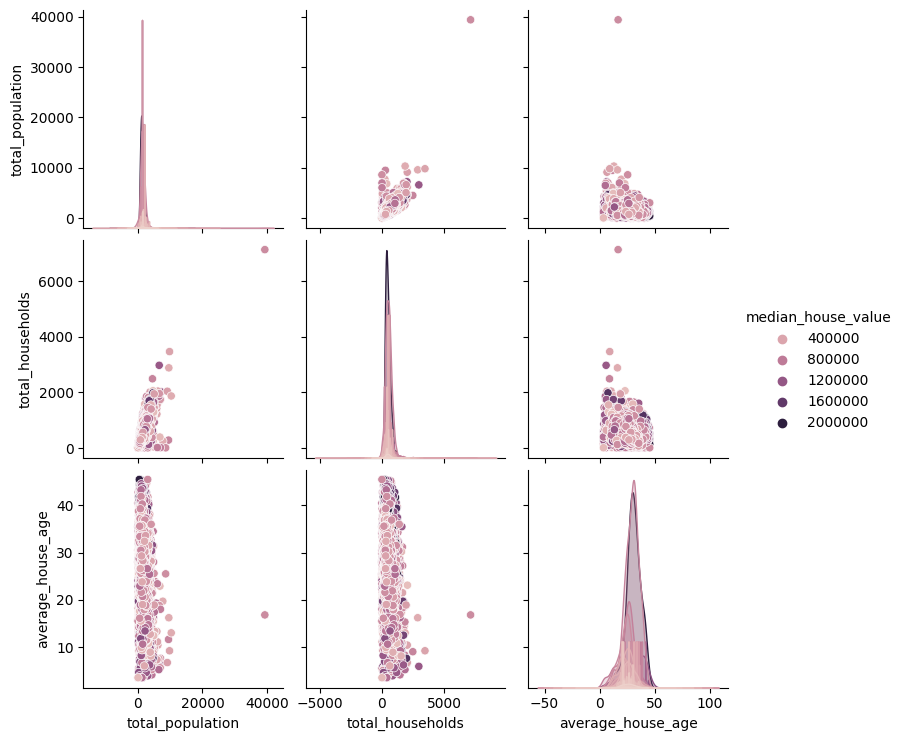

In [ ]:
plot1 = ['median_house_value','total_population', 'total_households', 'average_house_age']
plot2 = ['median_house_value','total_bedrooms', 'longitude', 'latitude','ocean_proximity']
plot3 = ['median_house_value', 'total_rooms_/_total_households', 'household_income','violence_rate']
#encoded_Cityid = pd.get_dummies(df_merged_h_c['nameid'],prefix='city')
sns.pairplot(df_merged_h_c[plot1 ],hue= 'median_house_value')
#encoded_Cityid.

In [ ]:
sns.pairplot(df_merged_h_c[plot2],hue= 'median_house_value')


KeyError: "['total_bedrooms'] not in index"

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


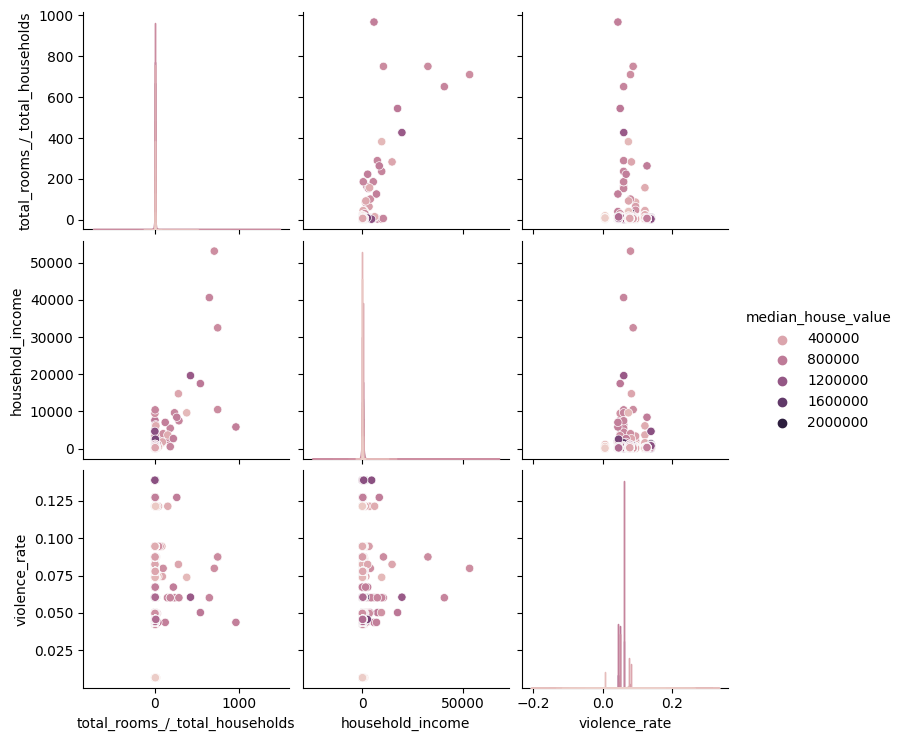

In [ ]:
sns.pairplot(df_merged_h_c[plot3],hue= 'median_house_value')

<Axes: >

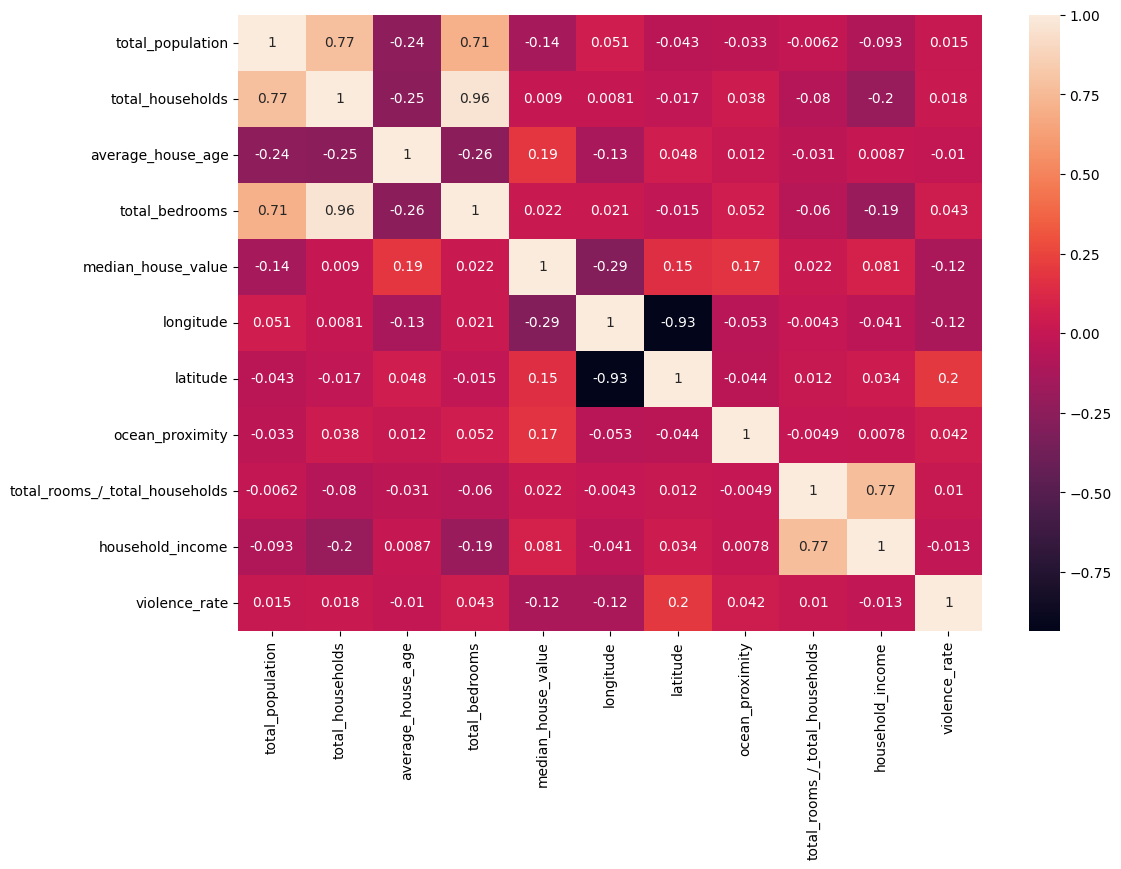

In [ ]:
#df_merged_h_c = df_merged_h_c.drop(columns=['name'])
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_h_c.corr(),annot=True)

In [ ]:
df_merged_h_c

,total_population,total_households,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity,total_rooms_/_total_households,household_income,violence_rate
0,1713.0,644.0,23.5,723.0,1633100.0,-122.2344,37.8681,0,8.229814,233.727003,0.050272
1,1322.0,630.0,16.7,688.0,1126800.0,-122.2222,37.8587,3,7.198413,265.432095,0.050272
2,940.0,417.0,43.0,429.0,1646200.0,-122.2480,37.8503,0,6.714628,412.346379,0.050272
3,1043.0,413.0,38.6,427.0,1418800.0,-122.2517,37.8457,3,5.513317,365.409298,0.050272
4,1206.0,423.0,36.9,463.0,1447400.0,-122.2480,37.8450,0,6.106383,396.400236,0.050272
...,...,...,...,...,...,...,...,...,...,...,...
25260,583.0,235.0,22.9,235.0,922300.0,-119.2009,34.2929,4,7.008511,598.415574,0.077755
25261,2906.0,1049.0,26.6,1290.0,892000.0,-119.2244,34.3043,4,8.650143,138.833480,0.077755
25262,1125.0,309.0,29.3,371.0,422000.0,-118.7852,34.3978,1,6.375405,295.739482,0.077755
25263,1294.0,380.0,23.8,401.0,372900.0,-118.8004,34.4066,1,5.428947,177.146816,0.077755


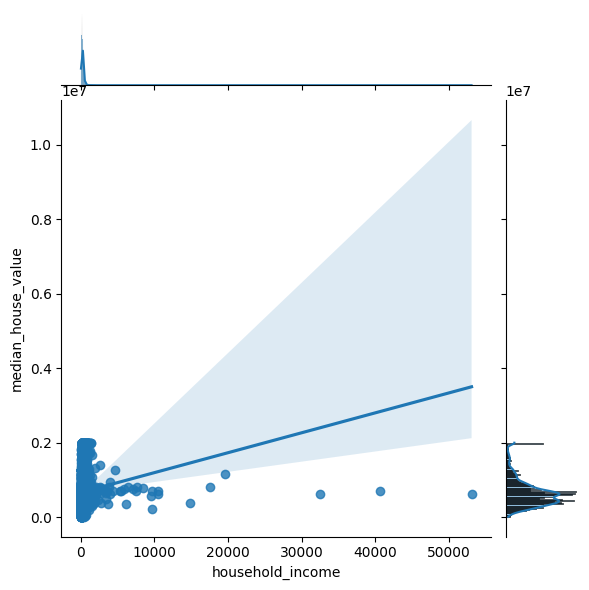

In [ ]:
sns.jointplot(data=df_merged_h_c,y='median_house_value',x='household_income',kind='reg')


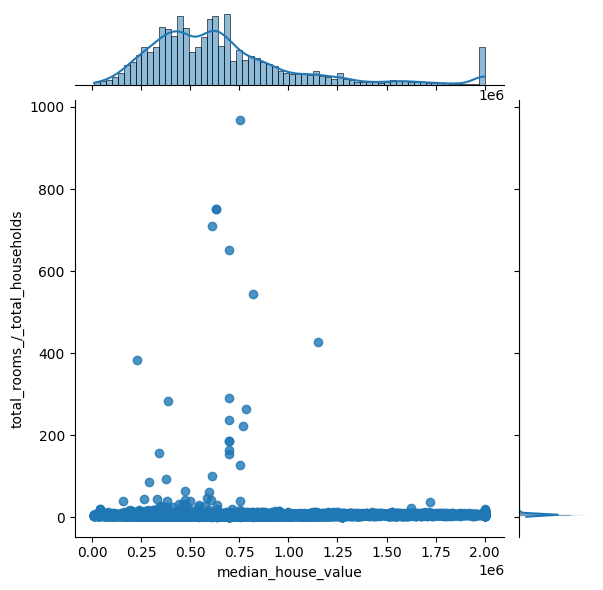

In [ ]:
sns.jointplot(data=df_merged_h_c,x='median_house_value',y='total_rooms_/_total_households',kind='reg')

In [ ]:
retirando outliers
df_merged_h_c.drop(df_merged_h_c[df_merged_h_c['total_rooms_/_total_households']>20].index.to_list(),axis=0,inplace=True)
df_merged_h_c.shape()

SyntaxError: invalid syntax (2666525996.py, line 1)

<Axes: xlabel='longitude', ylabel='latitude'>

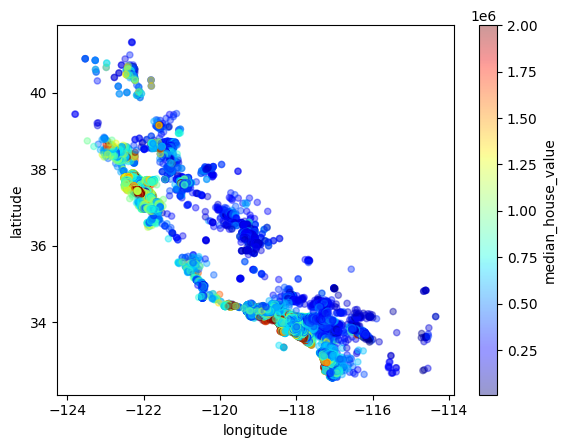

In [ ]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='median_house_value',cmap=plt.get_cmap("jet"))

<Axes: xlabel='longitude', ylabel='latitude'>

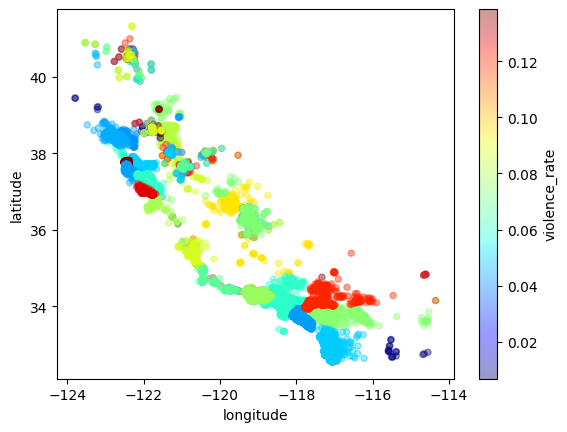

In [ ]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='violence_rate',cmap=plt.get_cmap("jet"))


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_crime.corr(),annot=True)

ValueError: could not convert string to float: 'Adelanto'

<Figure size 1200x800 with 0 Axes>